In [ ]:
# Question 1: The Basics of Multiple Linear Regression 🏠
# A real estate company wants to predict house prices based on more than just square footage. They believe the number of bedrooms and the age of the house are also important factors.

# Dataset:

# Python

# import pandas as pd

# data1 = {
#     'Price_in_thousands': [245, 312, 279, 308, 199, 219, 405, 324, 319, 255],
#     'Square_Feet': [1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700],
#     'Bedrooms': [3, 3, 3, 2, 2, 3, 4, 4, 2, 3],
#     'House_Age_Years': [5, 8, 3, 12, 20, 15, 2, 10, 7, 9]
# }
# df1 = pd.DataFrame(data1)
# Your Tasks:

# Build the Model: Using scikit-learn, build a multiple linear regression model with Square_Feet, Bedrooms, and House_Age_Years as your features (X) to predict Price_in_thousands (Y).

# Find the Equation: Print the model's intercept and the coefficients for each of the three features.

# Interpret the Coefficients: Explain what each coefficient means in the context of this problem. For example, for the 'Bedrooms' coefficient, you would say: "Holding all other features constant, for each additional bedroom, the price is expected to change by..."

# Evaluate Performance: Calculate the R-squared and the RMSE for your model. Does this model explain the variance in house prices well?

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error
import matplotlib.pyplot as plt

data1 = {
    'Price_in_thousands': [245, 312, 279, 308, 199, 219, 405, 324, 319, 255],
    'Square_Feet': [1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700],
    'Bedrooms': [3, 3, 3, 2, 2, 3, 4, 4, 2, 3],
    'House_Age_Years': [5, 8, 3, 12, 20, 15, 2, 10, 7, 9]
}
df = pd.DataFrame(data1)

x = df[['Square_Feet','Bedrooms','House_Age_Years']]
y = df['Price_in_thousands']

model = LinearRegression()
model.fit(x,y)

y_predict = model.predict(x)

print("intercept of the multi dimensional line = ", model.intercept_)
print("slope/coefficient for Square_feet feature = ", model.coef_[0])
print("slope/coefficient for Bedroom feature = ", model.coef_[1])
print("slope/coefficent for House_Age_Years feature = ", model.coef_[2])
print("r_squared = ", r2_score(y,y_predict))
print("root mean squared error = ", root_mean_squared_error(y,y_predict))

# equation is as follows [y =  222.16 + 0.127*Square_feet - 36.296*Bedrooms - 5.432*House_Age_Years]
# By looking at the equation and the coefficients we can say for every prediction of y we can say price is impacted 0.127 times by each square feet, -36.296 times for each bedroom and -5.432 times each year the house ages. In simple terms - :
# Square_Feet (0.127): Holding the number of bedrooms and the house's age constant, for each additional square foot, the price is expected to increase by $127. 
# House_Age_Years (-5.432): Holding the square footage and number of bedrooms constant, for each additional year of age, the price is expected to decrease by $5,432.
# Bedrooms (-36.296): Holding the square footage and age constant, for each additional bedroom, the price is expected to decrease by $36,296, which is kinda fishy
# the R-Squared tells us that 79.38 percent of the variation in Price in thousands of the home can be explained combined by the 3 variables in consideration which are Square Feet, Bedrooms and House Age Years.
# the root mean squared error is also low at 25.92 but it also means that the prediction in price of the house could be off by about 26000 dollars, which is a pretty huge gap. I feel the model needs to be trained again by eliminating potential outliers or optimizations.

intercept of the multi dimensional line =  222.161657253427
slope/coefficient for Square_feet feature =  0.1277142136595077
slope/coefficient for Bedroom feature =  -36.2961664876731
slope/coefficent for House_Age_Years feature =  -5.4321594357396386
r_squared =  0.7938030739626369
root mean squared error =  25.92705707804311


In [ ]:
#  Question 2: Statistical Significance & Checking Assumptions 📊
# A team of automotive engineers wants to predict a car's fuel efficiency (Miles Per Gallon). They have collected data on the car's weight, horsepower, and number of cylinders. They suspect 'cylinders' might not be a very useful predictor once weight and horsepower are known.

# Dataset:

# Python

# import pandas as pd

# data2 = {
#     'MPG': [18, 15, 18, 16, 17, 15, 14, 14, 22, 18, 21],
#     'Weight_lbs': [3500, 3700, 3450, 3650, 3200, 4100, 4300, 4250, 2500, 2900, 2650],
#     'Horsepower': [130, 165, 150, 150, 140, 198, 220, 215, 88, 110, 95],
#     'Cylinders': [8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 4]
# }
# df2 = pd.DataFrame(data2)
# Your Tasks:

# Build a Statistical Model: Use the statsmodels.formula.api (specifically the ols function) to build a model. A common way to do this is: model = smf.ols('MPG ~ Weight_lbs + Horsepower + Cylinders', data=df2).fit()

# Check for Statistical Significance: Print the model.summary() and look at the table of coefficients.

# Identify the p-value for each feature.

# Are all the features statistically significant (p < 0.05)?

# Based on the p-values, which feature seems least useful for predicting MPG?

# Check for Linearity & Homoscedasticity:

# Calculate the model's fitted values (model.fittedvalues) and residuals (model.resid).

# Create a scatter plot of fitted values vs. residuals.

# Does the plot show a random cloud of points around zero (good!), or is there a clear pattern or cone shape (bad!)?

# Check for Normality of Residuals:

# Create a Q-Q plot (sm.qqplot(model.resid, line='s')).

# Do the points fall closely along the diagonal line? If so, the residuals are considered normally distributed.

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     25.27
Date:                Fri, 17 Oct 2025   Prob (F-statistic):           0.000395
Time:                        01:12:36   Log-Likelihood:                -12.269
No. Observations:                  11   AIC:                             32.54
Df Residuals:                       7   BIC:                             34.13
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.5190      3.672      7.493      0.0

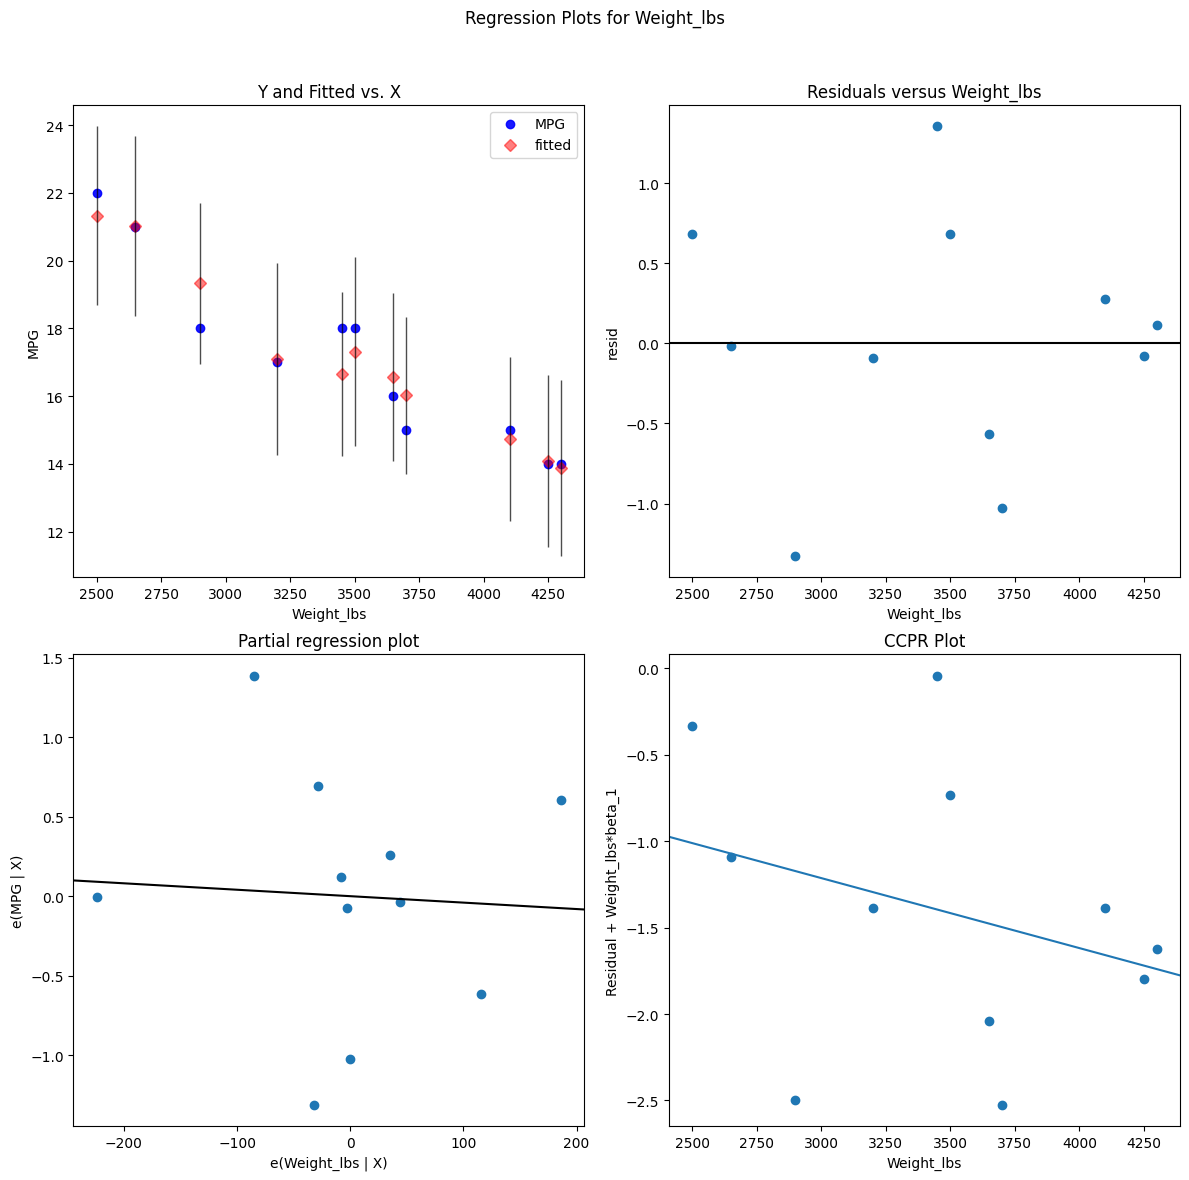

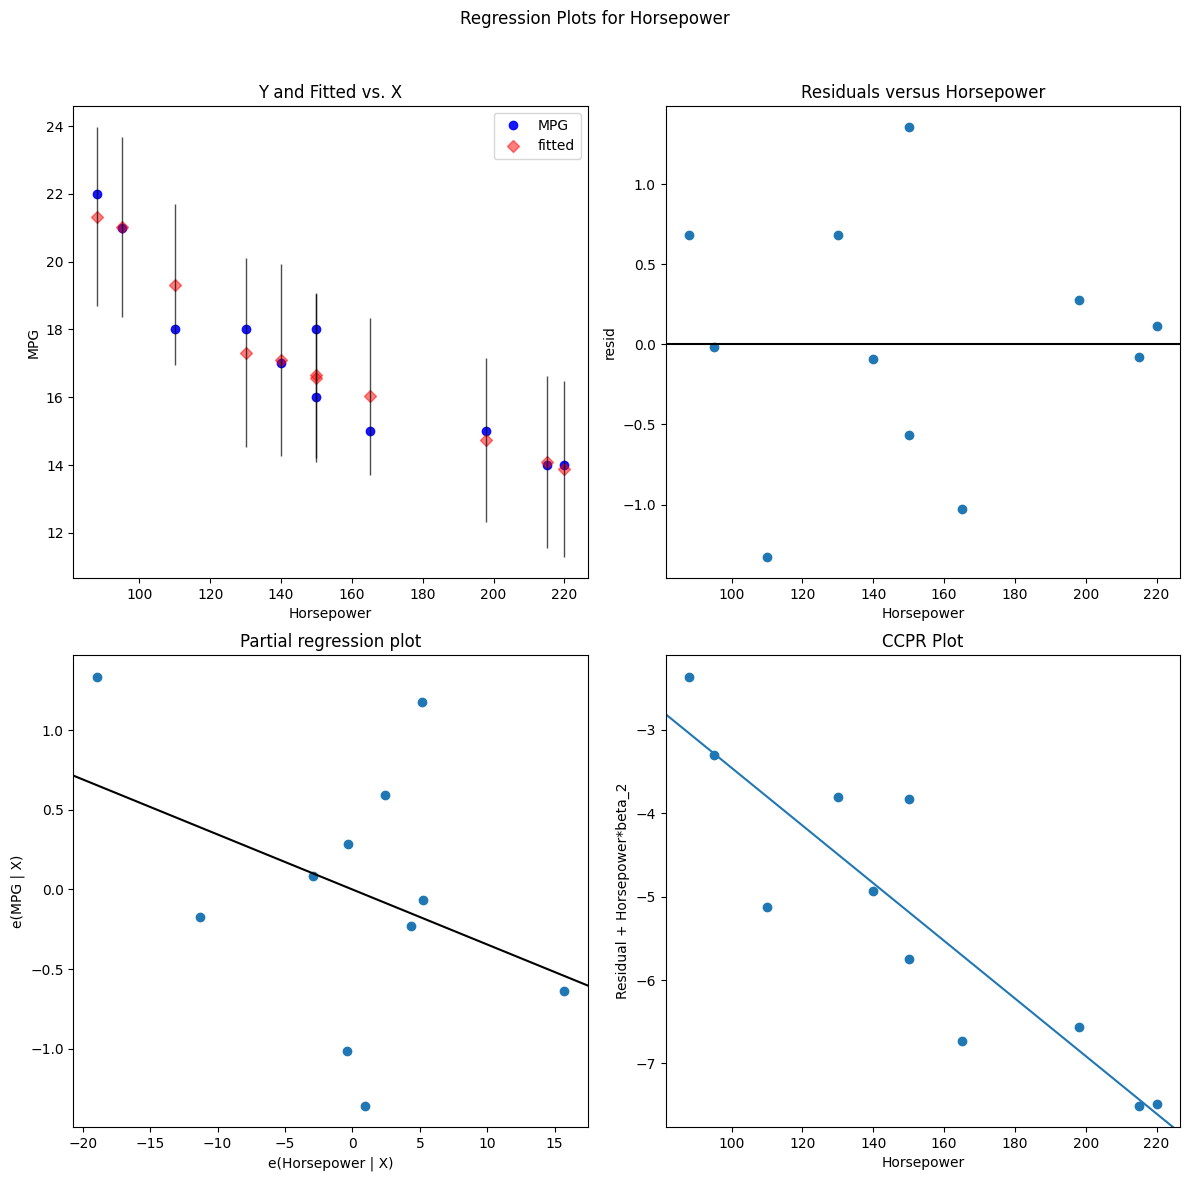

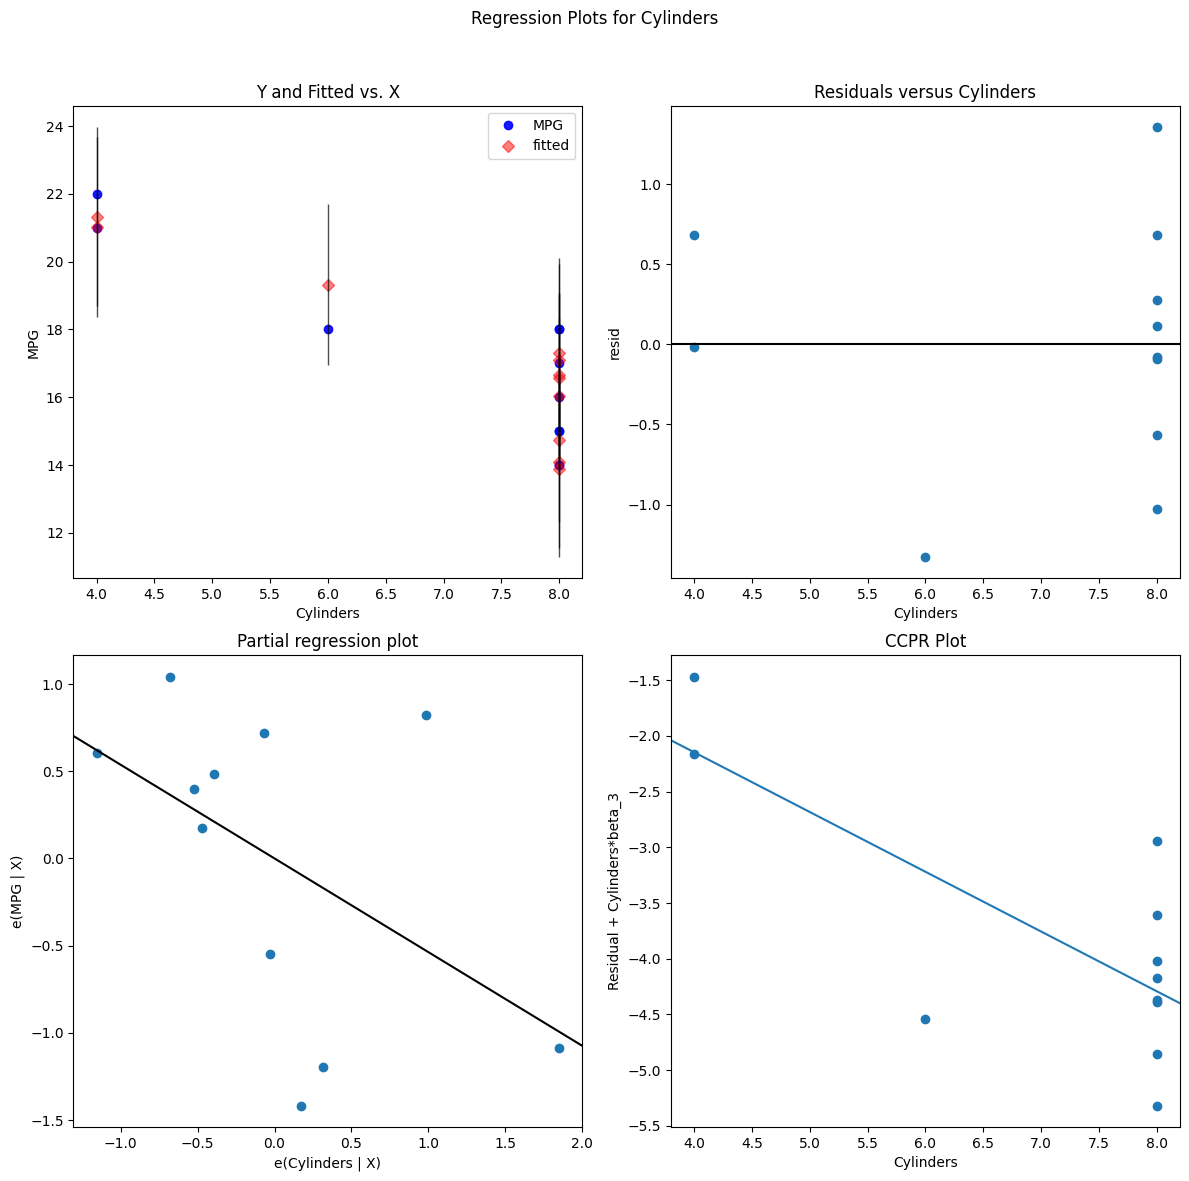

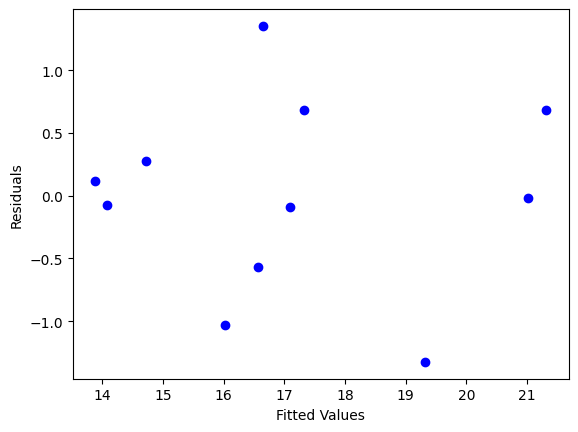

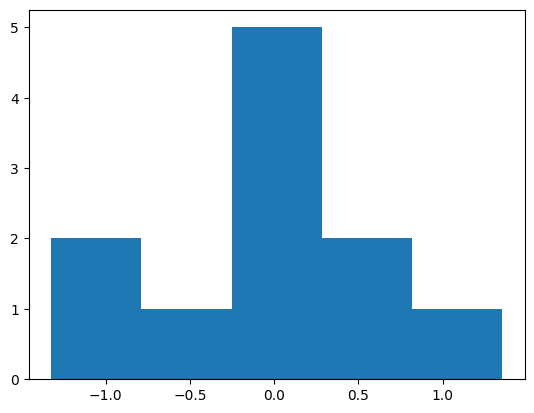

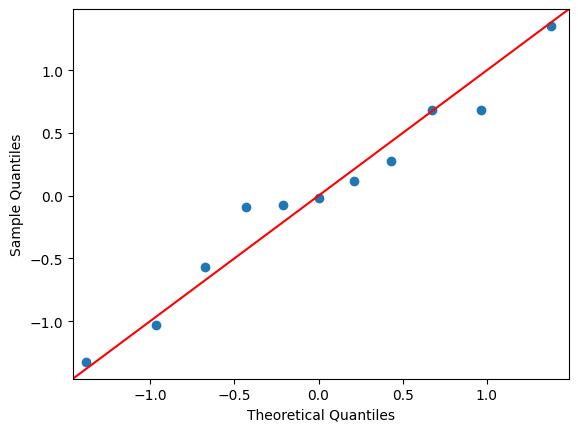

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm

data2 = {
    'MPG': [18, 15, 18, 16, 17, 15, 14, 14, 22, 18, 21],
    'Weight_lbs': [3500, 3700, 3450, 3650, 3200, 4100, 4300, 4250, 2500, 2900, 2650],
    'Horsepower': [130, 165, 150, 150, 140, 198, 220, 215, 88, 110, 95],
    'Cylinders': [8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 4]
}
df = pd.DataFrame(data2)


model = smf.ols(formula = 'MPG ~ Weight_lbs + Horsepower + Cylinders', data = df).fit()

print(model.summary())
# the p value for Weight_lbs is 0.888, Horsepower is 0.320 and Cylinders 0.169 which are quite big than the allowed limit of 0.05. any limit above 0.05 is considered unhealthy for the model.
# the features in the given dataset are non significant since the p value for all of them is greater than 0.05
# the R-Squared value does tell us that the data is linear whereas the p-values greater than 0.05 tells us otherwise i.e. the relationship is non linear. to confirm linearity i will need to draw graphs of the residuals.

fig = plt.figure(figsize=(12,12))
fig2 = plt.figure(figsize=(12,12))
fig3 = plt.figure(figsize=(12,12))

sm.graphics.plot_regress_exog(model, "Weight_lbs", fig);
sm.graphics.plot_regress_exog(model, "Horsepower", fig2);
sm.graphics.plot_regress_exog(model, "Cylinders", fig3);
plt.show()



# looking at the graphs i can confirm that there is linearity for features Weight_lbs and Horsepower, but Cylinders feature seems to be non linear. it also has the highest std error.

fitted_values = model.fittedvalues
residuals = model.resid

plt.scatter(fitted_values,residuals, color = 'blue')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show();
plt.hist(residuals, bins = 5)
plt.show();
sm.qqplot(residuals, line = '45');
#  looking at the plot of the fitted values versus residuals i can see that the residuals do not appear to have a cone shaped pattern and are randomly scattered around the 0 line. therefore homoscedasticity holds, the model's prediction is consistent across all levels of prediction.
# looking at the plot i can say the normality of the residuals hold to some extent, building the qq plot also suggests the same.